# Notebook for analysing data generated from the Segway

Text(0.5, 0, 'T [s]')

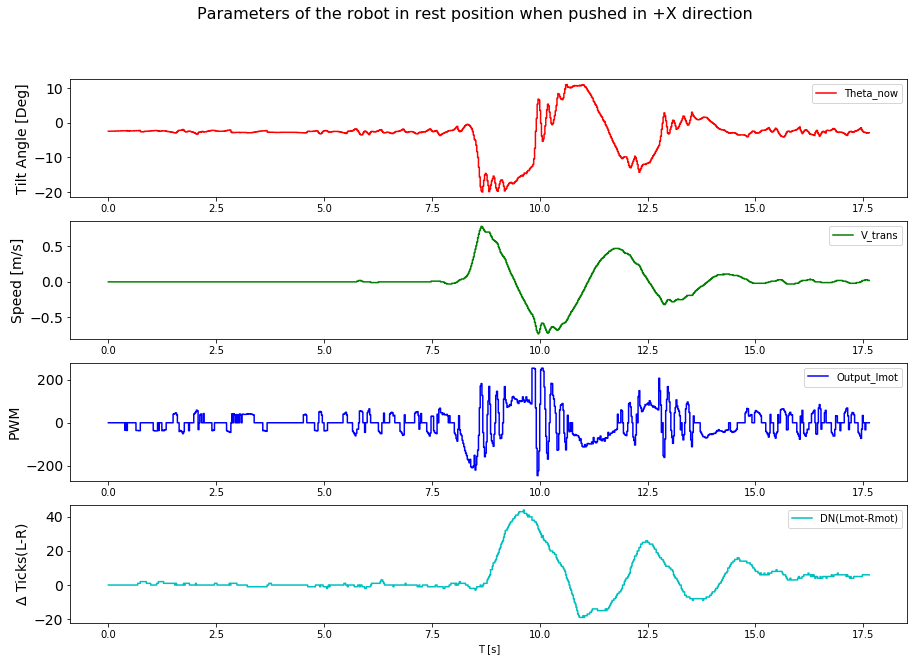

In [29]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_csv("Set_4.txt")

df1["DN(Lmot-Rmot)"] = df1["DN_Lmot"] - df1["DN_Rmot"]

cols2plot = ['Theta_now','V_trans','Output_lmot','DN(Lmot-Rmot)']
units = ["Tilt Angle [Deg]", "Speed [m/s]", "PWM", "$\Delta$ Ticks(L-R)", "Ticks", "Ticks"]

clr = ['r','g','b','c','b','g', 'r', 'k', 'm']

dt = 0.02 # Sampling time [s]

t = [i*dt for i in range(len(df1)) ]
k1 = 0; k2 = len(df1); # To select portions of the data 

plt.close("all")
plt.figure(figsize = (15,10))
plt.suptitle("Parameters of the robot in rest position when pushed in +X direction", fontsize = 16)

for i,col, unit in zip(range(len(cols2plot)), cols2plot, units):
    plt.subplot(len(cols2plot),1,i+1)
    plt.step(t[k1:k2], df1.loc[k1:k2, col], clr[i], label = col)
    plt.legend(loc = "upper right")
    plt.ylabel(unit, fontsize = 14)
    plt.yticks(fontsize = 14)

plt.xlabel("T [s]")


# Frequency of oscillation of the robot when pushed by an external impulse

In order to calculate the frequency of oscillation of the robot, we can use fourier transform of the velocity. By changing the dataset

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 <a list of 9 Text xticklabel objects>)

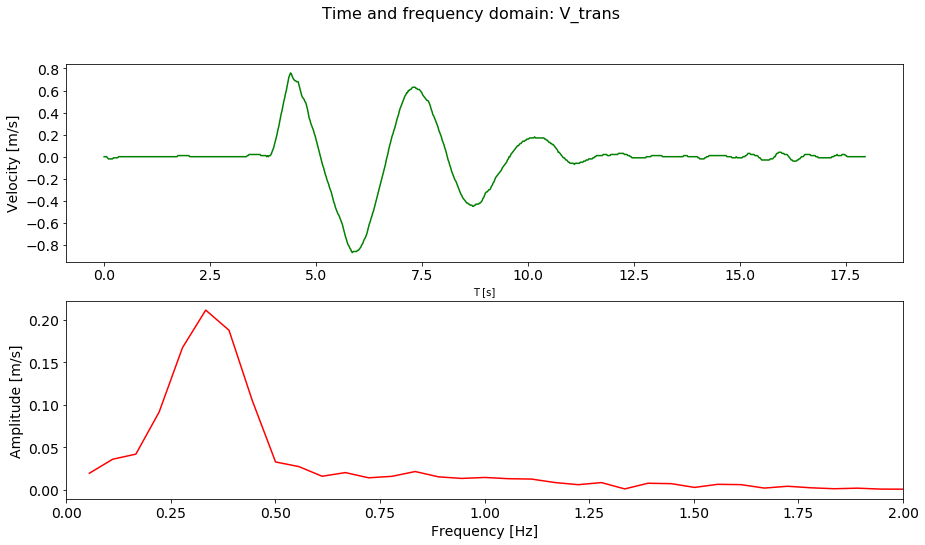

In [35]:
df2 = pd.read_csv("Set_2.txt")
t1 = [i*dt for i in range(len(df2)) ]
a = df2["V_trans"]
y = np.fft.fft(a) # Getting complex coefficients of the data points in frequency domain
C = np.fft.fftfreq(len(t1),dt)# Getting the frequency bins [Hz]

plt.figure(figsize = (15,8))
plt.suptitle("Time and frequency domain: V_trans", fontsize = 16)
plt.subplot(211)
plt.plot(t1,a, "g")
plt.xlabel("T [s]");plt.ylabel("Velocity [m/s]", fontsize = 14); plt.yticks(fontsize = 14);plt.xticks(fontsize = 14)

plt.subplot(212)
plt.plot(C[C>0],abs(y[C>0])/(0.5*len(y)), "r")
plt.xlim(0,2)
plt.xlabel("Frequency [Hz]", fontsize = 14); plt.xticks(fontsize = 14)
plt.ylabel("Amplitude [m/s]",fontsize = 14);  plt.yticks(fontsize = 14); plt.xticks(fontsize = 14)
